In [5]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows',100)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [6]:
# Load DataSet
train=pd.read_csv("HousePrices/train.csv")
test=pd.read_csv("HousePrices/test.csv")

##### Step 1 - EDA

In [7]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
train.shape

(1460, 81)

In [9]:
train.drop(["Id"],axis=1,inplace=True)

In [10]:
train.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [11]:
train.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [12]:
for feature in train.columns:
    if train[feature].isnull().sum()>0:
        print(feature)

LotFrontage
Alley
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


In [13]:
nullCols=[feature for feature in train.columns if train[feature].isnull().sum()>0]
nullCols

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [14]:
train.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [15]:
train.shape[0]

1460

In [16]:
trainNullPer= train.apply(lambda x : np.round(100*x.isnull().sum()/train.shape[0],2))
trainNullCount=train.isnull().sum()
trainNullDF=pd.DataFrame([trainNullCount,trainNullPer]).T
trainNullDF.columns=['NullValues','NullPercentage']
trainNullDF.sort_values(by='NullValues',ascending=False,inplace=True)
trainNullDF.reset_index(inplace=True)
trainNullDF.head(10)

,index,NullValues,NullPercentage
0,PoolQC,1453.0,99.52
1,MiscFeature,1406.0,96.30
2,Alley,1369.0,93.77
3,Fence,1179.0,80.75
4,FireplaceQu,690.0,47.26
5,LotFrontage,259.0,17.74
6,GarageYrBlt,81.0,5.55
7,GarageCond,81.0,5.55
8,GarageType,81.0,5.55
9,GarageFinish,81.0,5.55


In [17]:
# Dropping the columns more than 50% of null values
train.drop(["PoolQC","MiscFeature","Alley","Fence","FireplaceQu"],axis=1,inplace=True)

In [18]:
trainNullPer= train.apply(lambda x : np.round(100*x.isnull().sum()/train.shape[0],2))
trainNullCount=train.isnull().sum()
trainNullDF=pd.DataFrame([trainNullCount,trainNullPer]).T
trainNullDF.columns=['NullValues','NullPercentage']
trainNullDF.sort_values(by='NullValues',ascending=False,inplace=True)
trainNullDF.reset_index(inplace=True)
trainNullDF.head(10)

,index,NullValues,NullPercentage
0,LotFrontage,259.0,17.74
1,GarageType,81.0,5.55
2,GarageYrBlt,81.0,5.55
3,GarageFinish,81.0,5.55
4,GarageQual,81.0,5.55
5,GarageCond,81.0,5.55
6,BsmtFinType2,38.0,2.60
7,BsmtExposure,38.0,2.60
8,BsmtQual,37.0,2.53
9,BsmtCond,37.0,2.53


In [19]:
trainNullDF.head(20)

,index,NullValues,NullPercentage
0,LotFrontage,259.0,17.74
1,GarageType,81.0,5.55
2,GarageYrBlt,81.0,5.55
3,GarageFinish,81.0,5.55
4,GarageQual,81.0,5.55
5,GarageCond,81.0,5.55
6,BsmtFinType2,38.0,2.60
7,BsmtExposure,38.0,2.60
8,BsmtQual,37.0,2.53
9,BsmtCond,37.0,2.53


In [20]:
nullColumns = np.array(trainNullDF[:14]["index"])
nullColumns

array(['LotFrontage', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtExposure',
       'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrArea', 'MasVnrType',
       'Electrical'], dtype=object)

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [22]:
train["GarageYrBlt"].dtype

dtype('float64')

In [23]:
for column in nullColumns:
    if train[column].dtype=="object":
        print(column)
        train[column].fillna(train[column].mode()[0],inplace=True)
    else:
        print(f"{column} this is numerical")
        train[column].fillna(train[column].median(),inplace=True)

LotFrontage this is numerical
GarageType
GarageYrBlt this is numerical
GarageFinish
GarageQual
GarageCond
BsmtFinType2
BsmtExposure
BsmtQual
BsmtCond
BsmtFinType1
MasVnrArea this is numerical
MasVnrType
Electrical


In [24]:
trainNullPer= train.apply(lambda x : np.round(100*x.isnull().sum()/train.shape[0],2))
trainNullCount=train.isnull().sum()
trainNullDF=pd.DataFrame([trainNullCount,trainNullPer]).T
trainNullDF.columns=['NullValues','NullPercentage']
trainNullDF.sort_values(by='NullValues',ascending=False,inplace=True)
trainNullDF.reset_index(inplace=True)
trainNullDF.head(10)

,index,NullValues,NullPercentage
0,MSSubClass,0.0,0.0
1,GarageYrBlt,0.0,0.0
2,Fireplaces,0.0,0.0
3,Functional,0.0,0.0
4,TotRmsAbvGrd,0.0,0.0
5,KitchenQual,0.0,0.0
6,KitchenAbvGr,0.0,0.0
7,BedroomAbvGr,0.0,0.0
8,HalfBath,0.0,0.0
9,FullBath,0.0,0.0


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [26]:
numericalColumns = train.select_dtypes(include=np.number).columns
numericalColumns 


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [27]:
objectColumns = train.select_dtypes(include=np.object).columns
objectColumns 

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

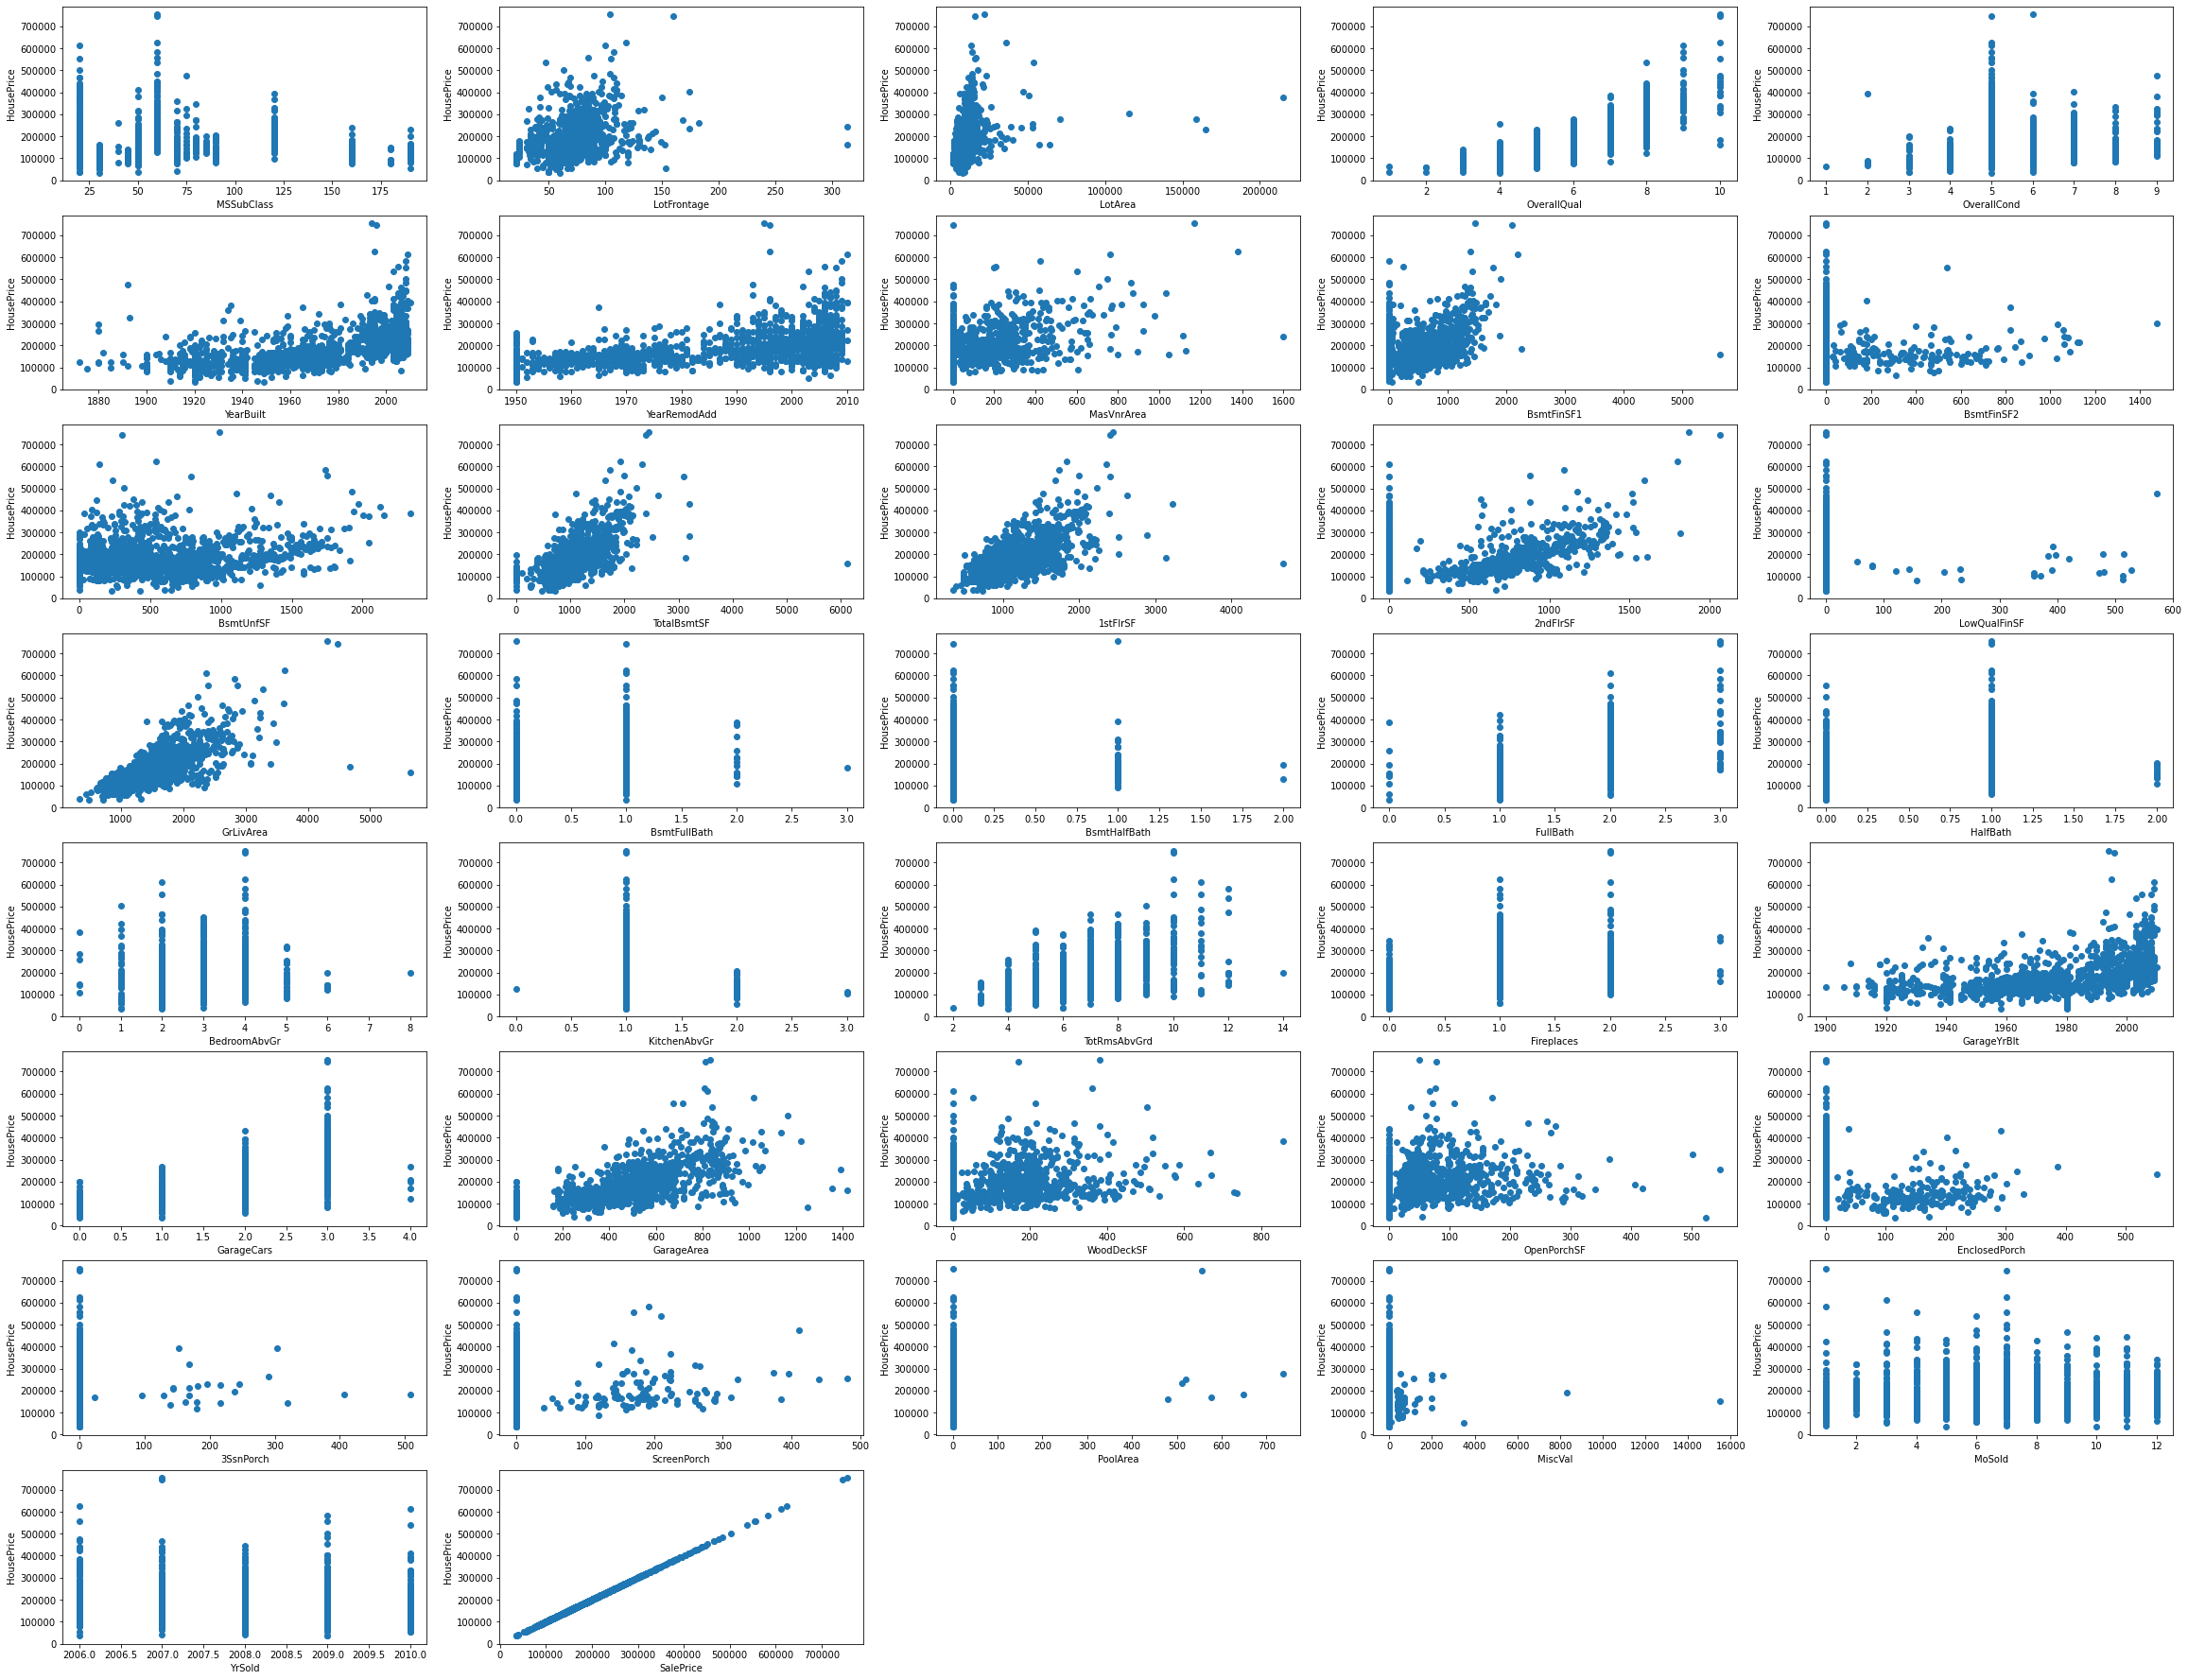

In [28]:
j=0
plt.figure(figsize=(40,40))
for column in numericalColumns:
    plt.subplot(10,5,j+1)
    plt.scatter(train[column],train['SalePrice'])
    plt.xlabel(column)
    plt.ylabel("HousePrice")
    j+=1

In [29]:
train["MSSubClass"].nunique()

15

In [30]:
train["LotFrontage"].nunique()

110

In [31]:
descriateCols=[]
continuesCols=[]

for column in numericalColumns:
    if train[column].nunique()>20:
        continuesCols.append(column)
    else:
        descriateCols.append(column)

In [32]:
continuesCols

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

In [33]:
descriateCols

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MoSold',
 'YrSold']

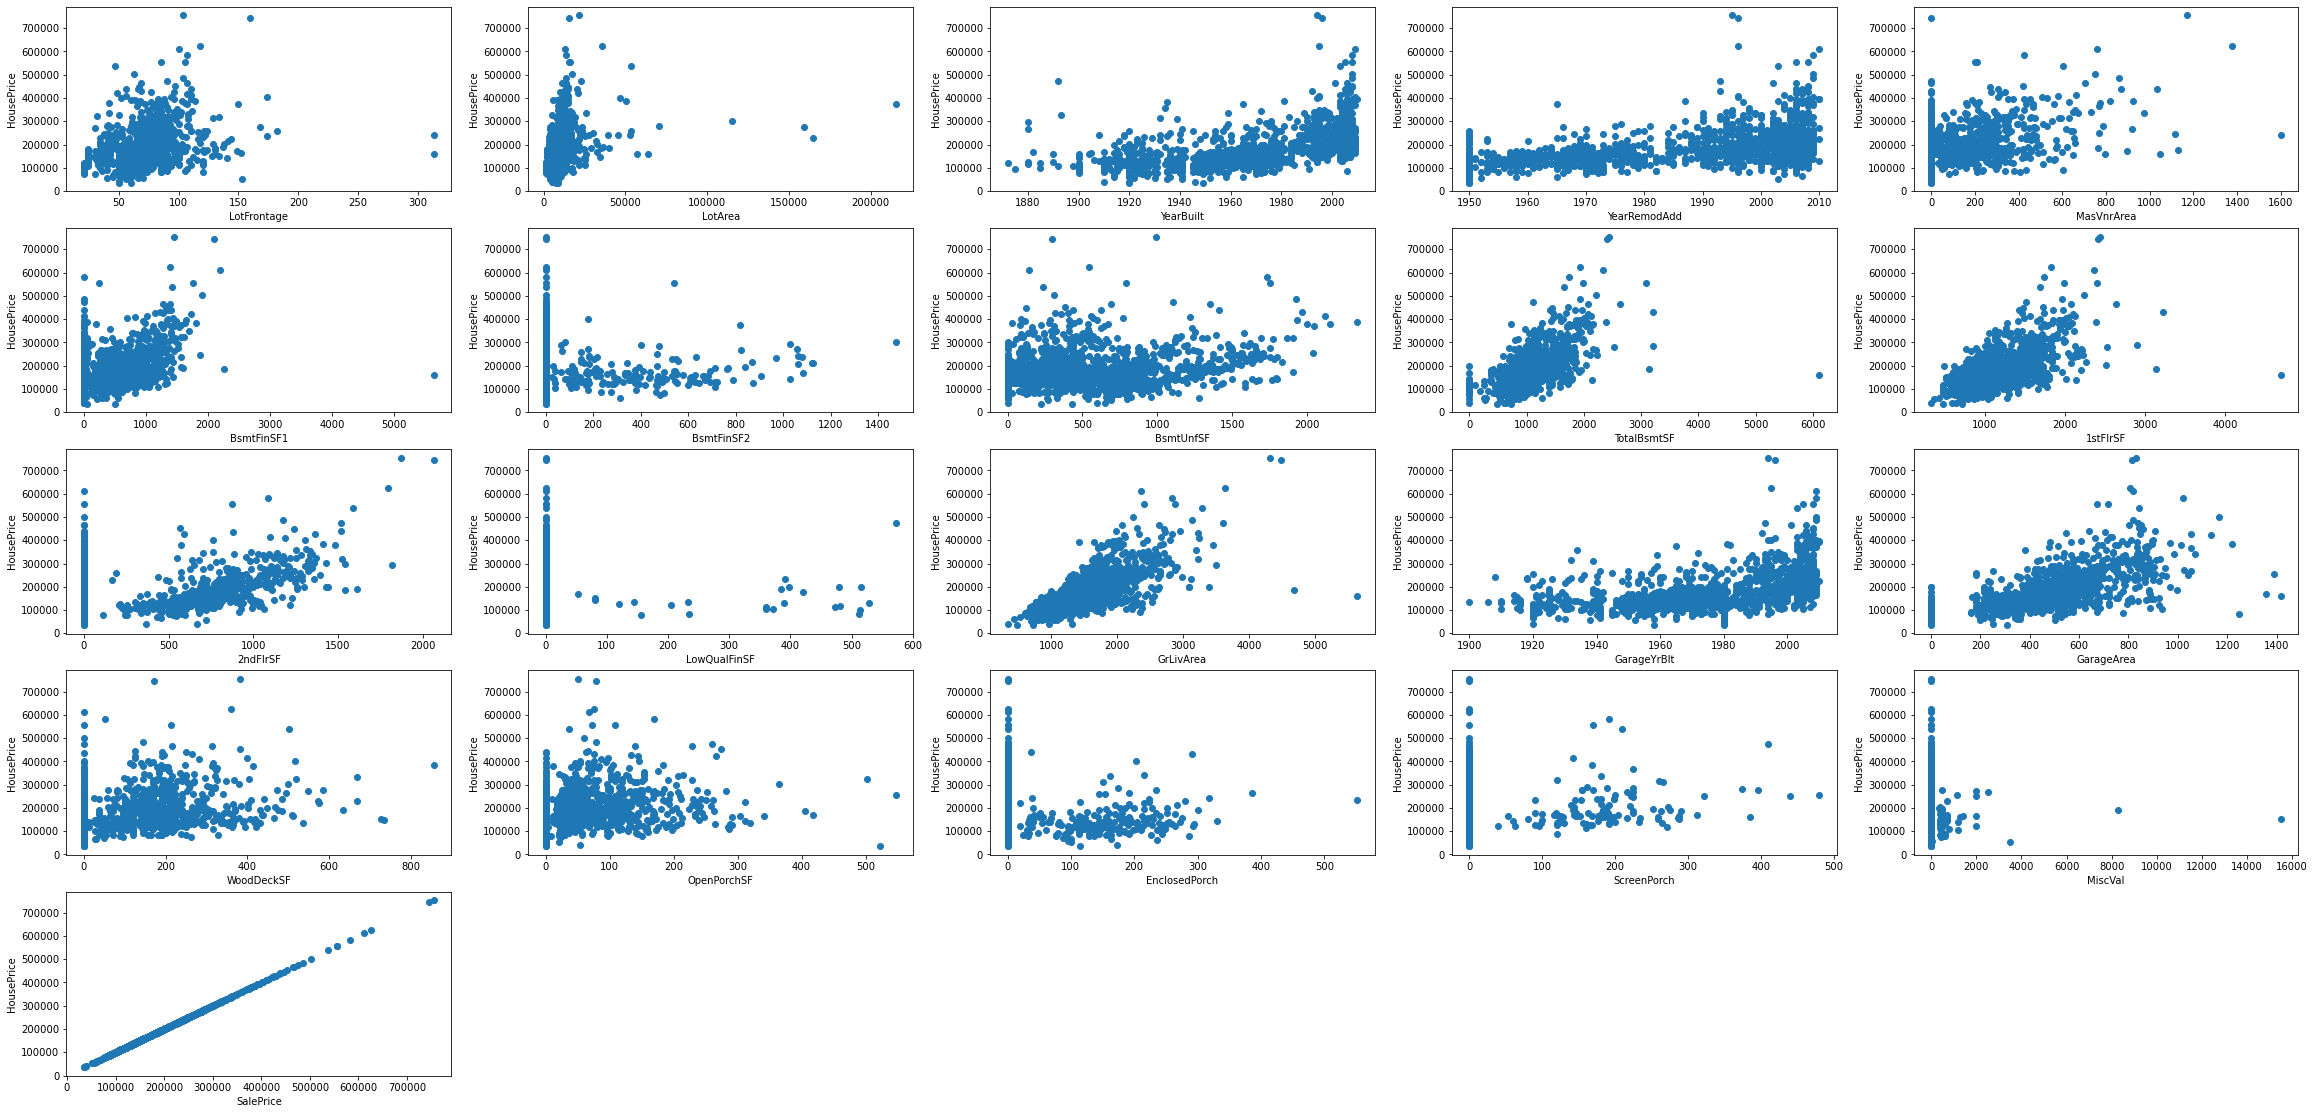

In [34]:
j=0
plt.figure(figsize=(40,40))
for column in continuesCols:
    plt.subplot(10,5,j+1)
    plt.scatter(train[column],train['SalePrice'])
    plt.xlabel(column)
    plt.ylabel("HousePrice")
    j+=1

In [35]:
# import matplotlib.gridspec as gridspec

# plt.figure(figsize=(12,28*4))
# gs = gridspec.GridSpec(28, 1)
# for i, cn in enumerate(continuesCols):
#     ax = plt.subplot(gs[i])
#     sns.distplot(train[cn][train.Class == 1], bins=50)
#     sns.distplot(train[cn][train.Class == 0], bins=50)
#     ax.set_xlabel('')
#     ax.set_title('histogram of feature: ' + str(cn))
# plt.show()

In [36]:
descriateCols

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MoSold',
 'YrSold']

<BarContainer object of 10 artists>

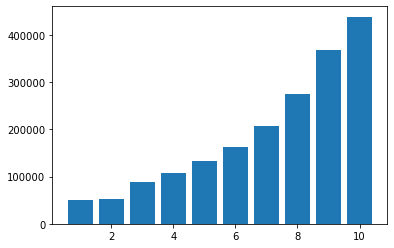

In [37]:
observationVal = train.groupby('OverallQual')['SalePrice'].mean()
observationValDF=pd.DataFrame(observationVal).sort_values(by = 'SalePrice',ascending=False)
observationValDF.reset_index(inplace =True)
plt.bar(observationValDF['OverallQual'],observationValDF['SalePrice'])

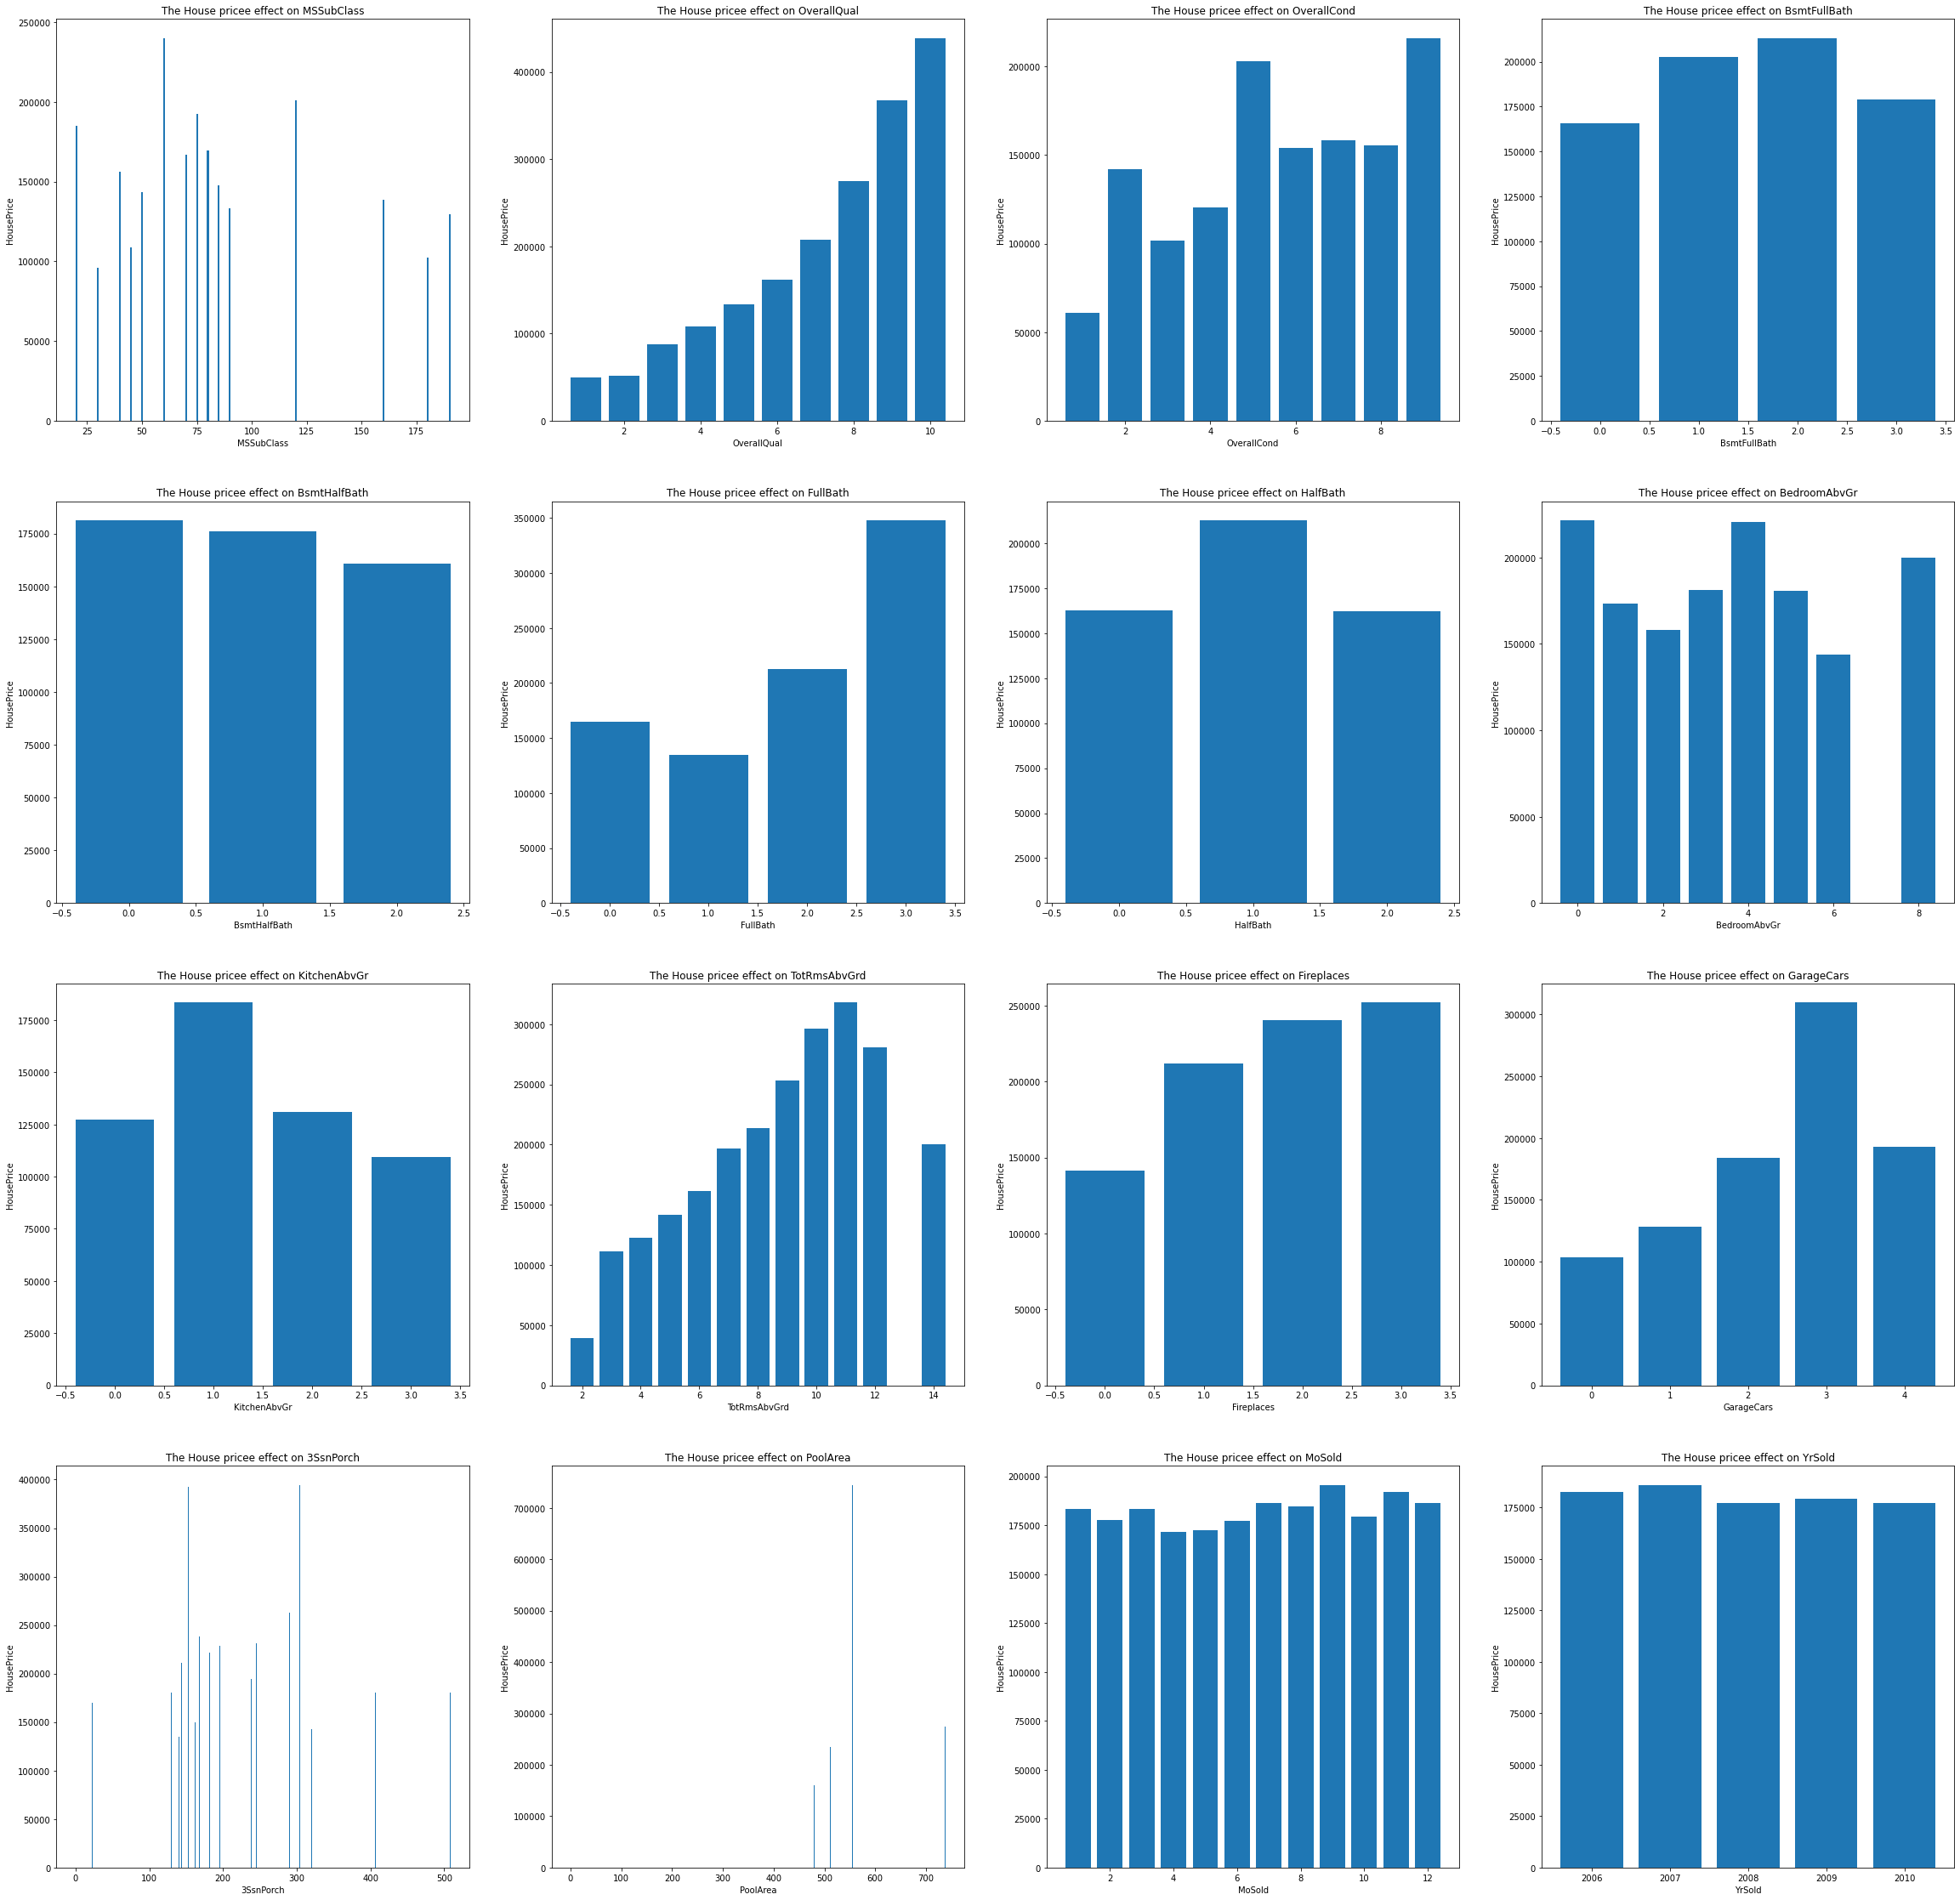

In [38]:
j=0
plt.figure(figsize=(40,40))
for column in descriateCols:
    plt.subplot(4,4,j+1)
    observationVal = train.groupby(column)['SalePrice'].mean()
    observationValDF=pd.DataFrame(observationVal).sort_values(by = 'SalePrice',ascending=False)
    observationValDF.reset_index(inplace =True)
    plt.bar(observationValDF[column],observationValDF['SalePrice'])
    plt.title(f"The House pricee effect on {column}")
    plt.xlabel(column)
    plt.ylabel("HousePrice")
    j+=1

In [39]:
len(objectColumns)

38

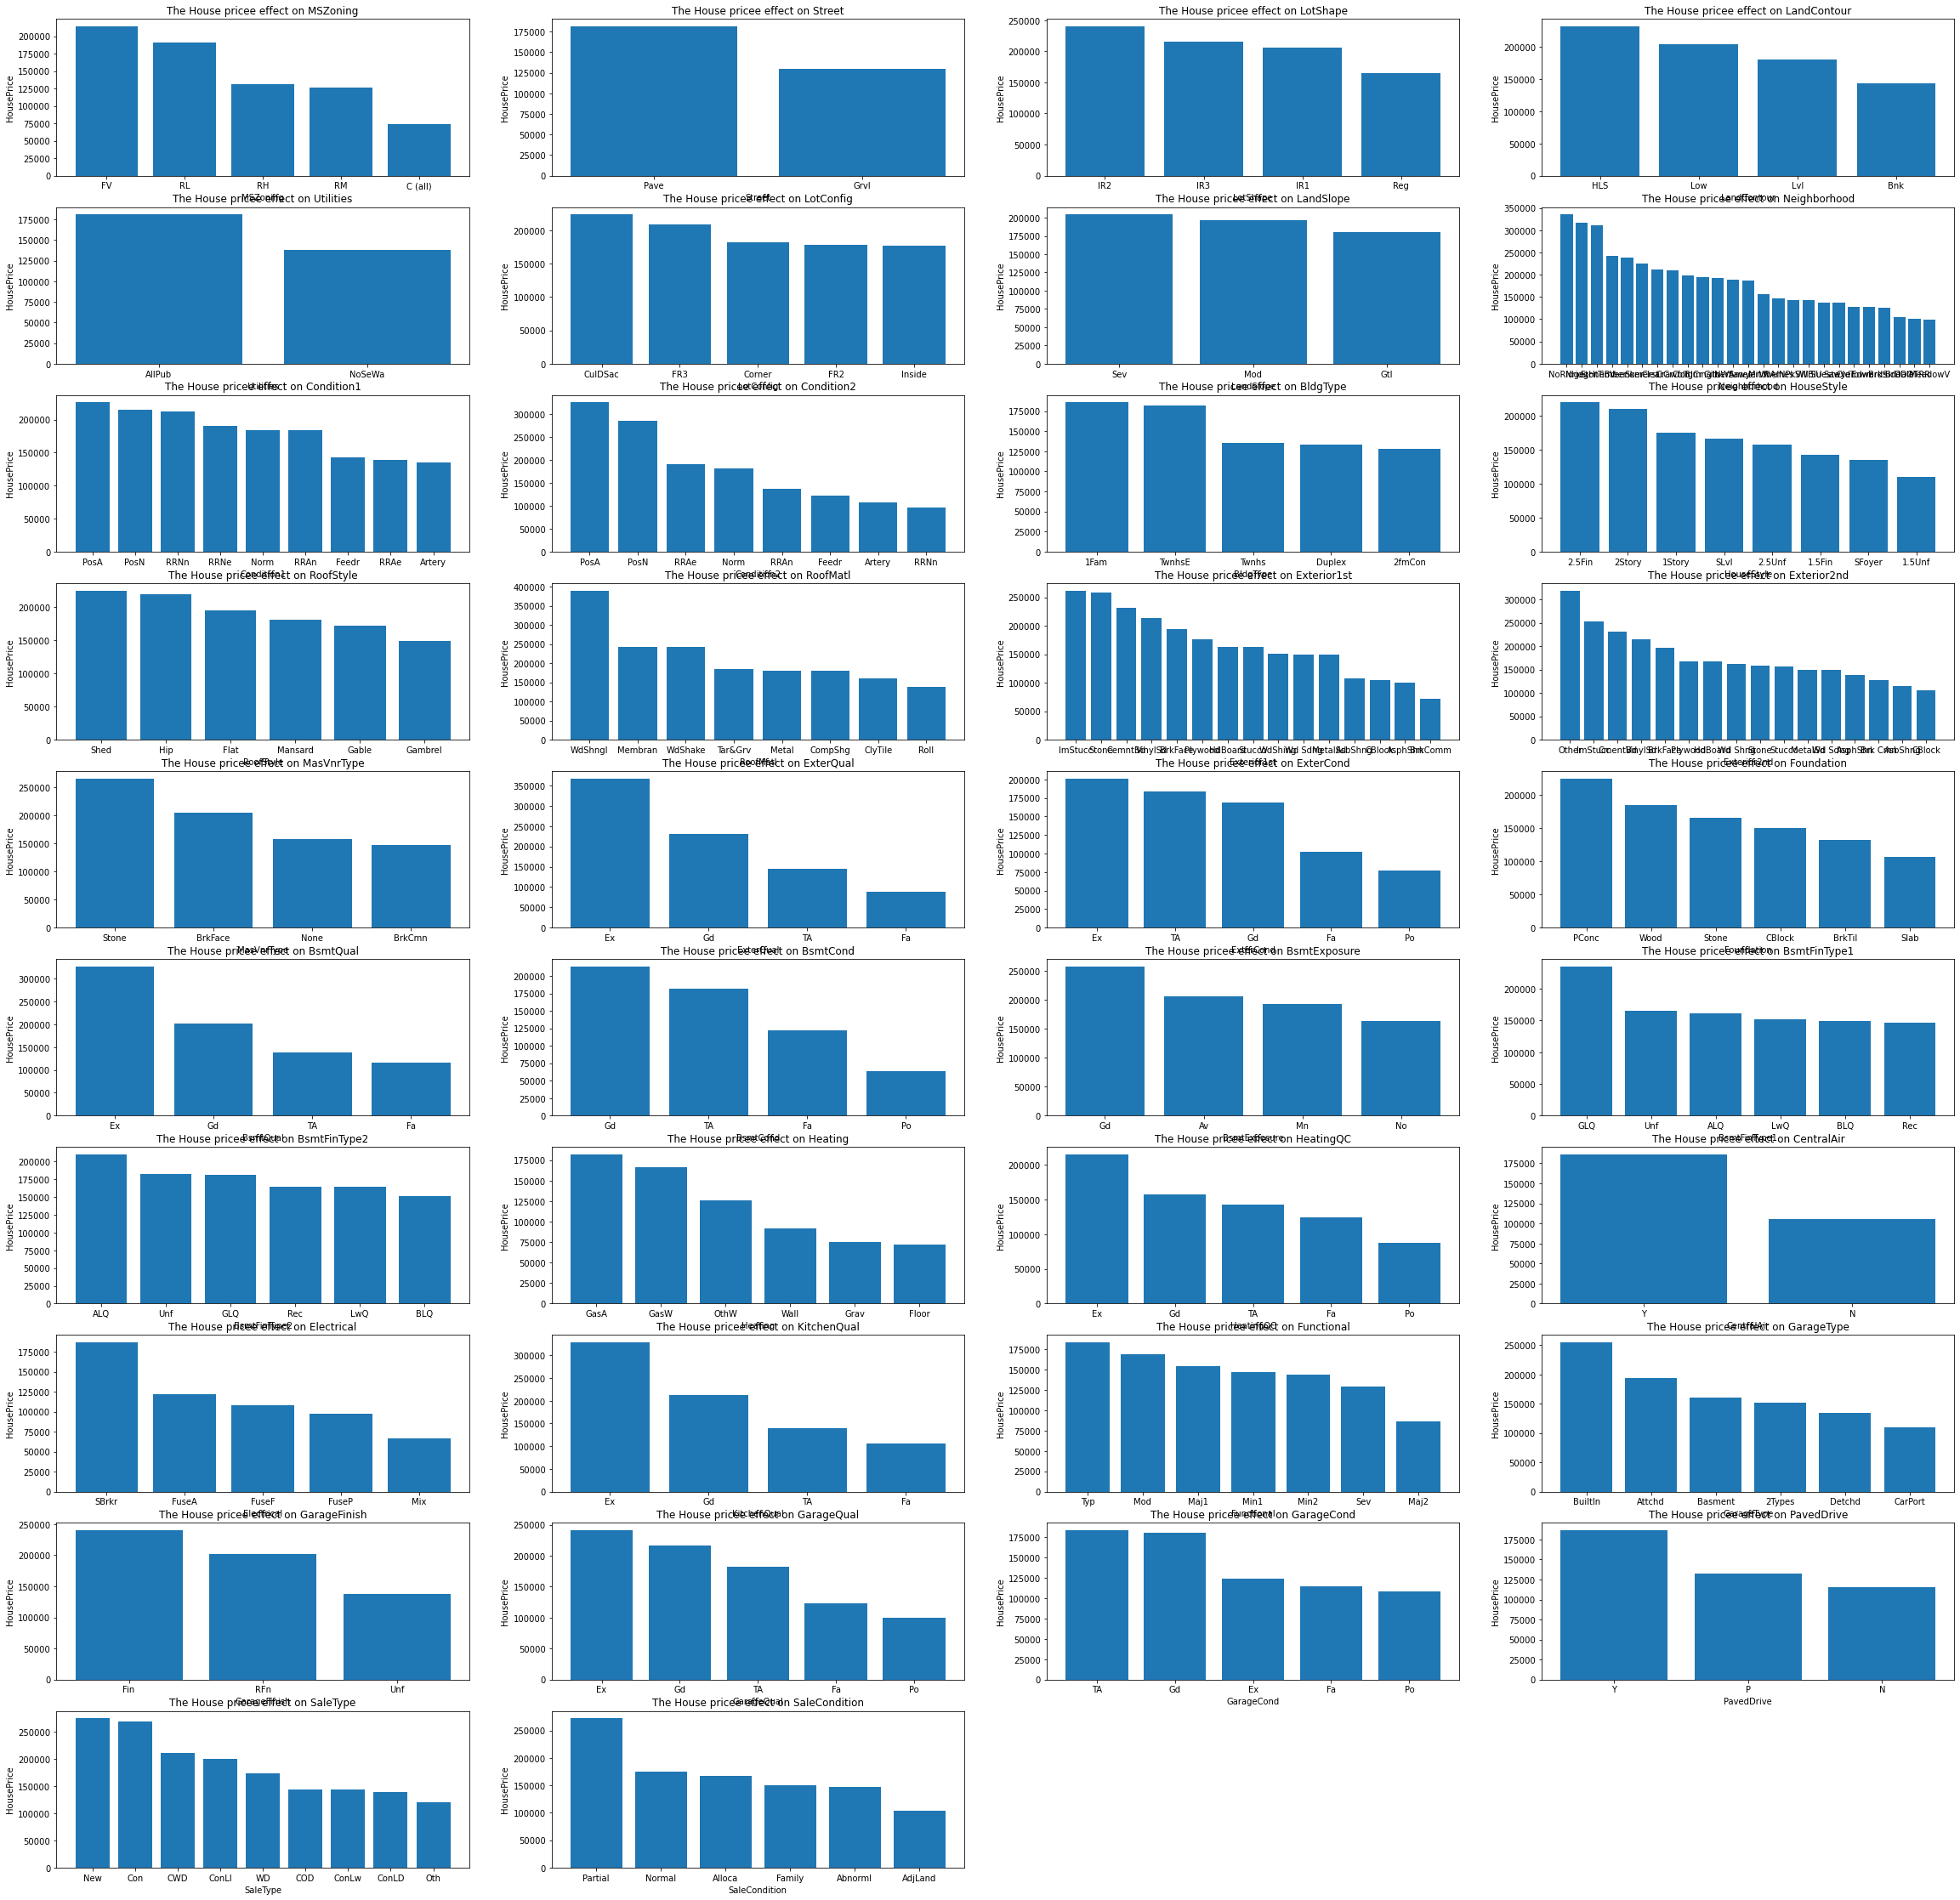

In [40]:

j=0
plt.figure(figsize=(40,40))
for column in objectColumns:
    plt.subplot(10,4,j+1)
    observationVal = train.groupby(column)['SalePrice'].mean()
    observationValDF=pd.DataFrame(observationVal).sort_values(by = 'SalePrice',ascending=False)
    observationValDF.reset_index(inplace =True)
    plt.bar(observationValDF[column],observationValDF['SalePrice'])
    plt.title(f"The House pricee effect on {column}")
    plt.xlabel(column)
    plt.ylabel("HousePrice")
    j+=1

#### Handling Outliers

In [41]:
continuesCols

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

In [42]:
train.shape

(1460, 75)

In [43]:
train['LotFrontage'].describe()

count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [44]:
upper_lim=train['LotFrontage'].mean()+train['LotFrontage'].std() *3
lower_lim=train['LotFrontage'].mean()-train['LotFrontage'].std() *3

train.loc[(train['LotFrontage'] >upper_lim),'LotFrontage'] = upper_lim
train.loc[(train['LotFrontage'] < lower_lim),'LotFrontage'] = lower_lim

In [45]:
for column in continuesCols:
    upper_lim=train[column].mean()+train[column].std() *3
    lower_lim=train[column].mean()-train[column].std() *3

    train.loc[(train[column] > upper_lim),column] = upper_lim
    train.loc[(train[column] < lower_lim),column] = lower_lim

In [46]:
lower_lim

-57406.31275824897

In [47]:
train[(train['LotFrontage'] <= upper_lim) & (train['LotFrontage'] >= lower_lim) ]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.000000,0,0.0,0,0.000000,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0.000000,0,0.0,0,0.000000,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0.000000,0,0.0,0,0.000000,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,205.311555,0,0.0,0,0.000000,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0.000000,0,0.0,0,0.000000,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.000000,0,0.0,0,0.000000,8,2007,WD,Normal,175000.0
1456,20,RL,85.0,13175.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.000000,0,0.0,0,0.000000,2,2010,WD,Normal,210000.0
1457,70,RL,66.0,9042.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.000000,0,0.0,0,1531.858114,5,2010,WD,Normal,266500.0
1458,20,RL,68.0,9717.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112.000000,0,0.0,0,0.000000,4,2010,WD,Normal,142125.0


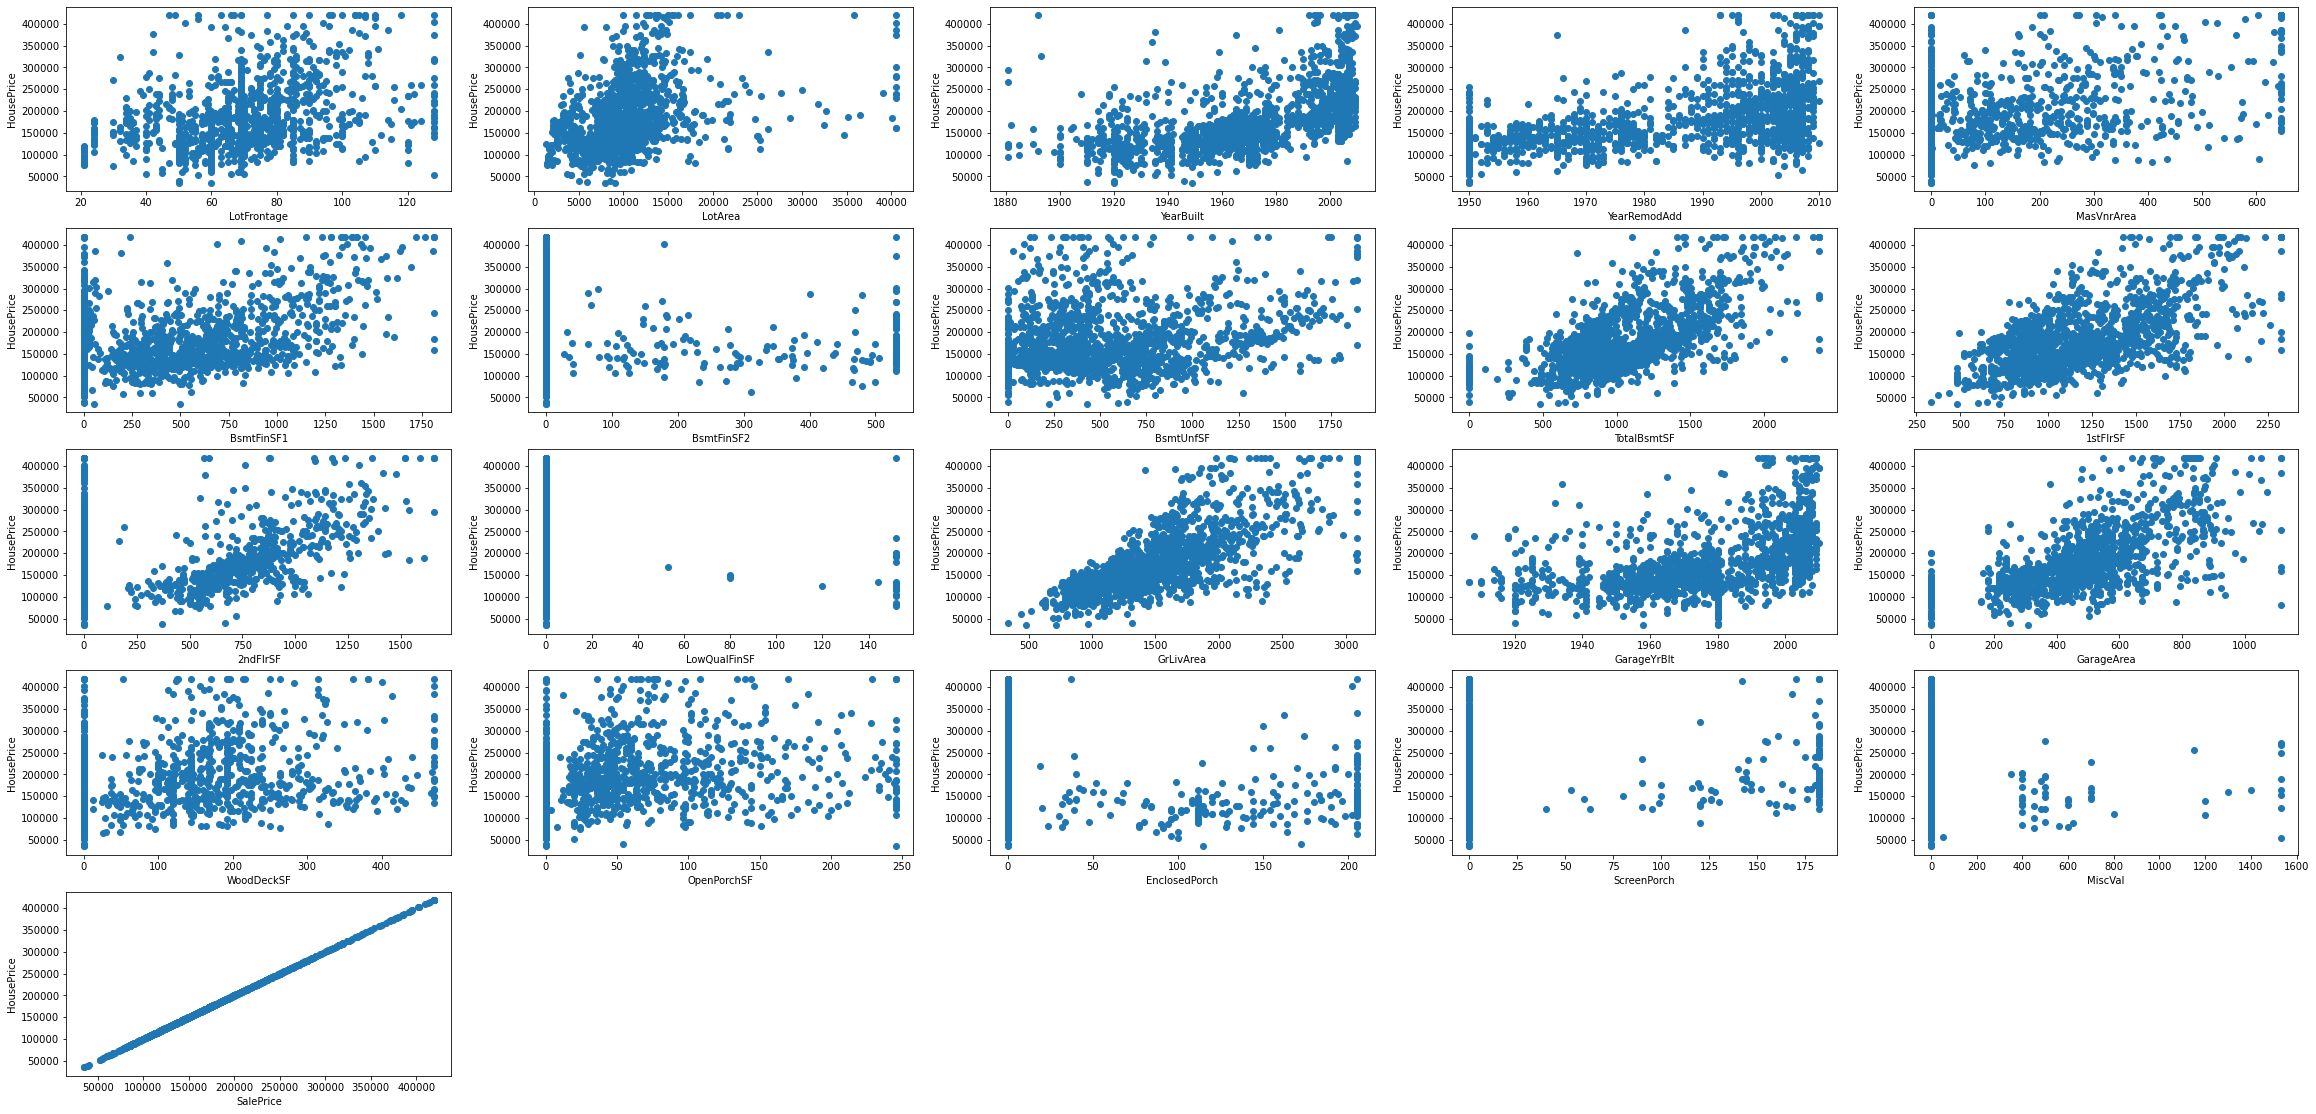

In [48]:
j=0
plt.figure(figsize=(40,40))
for column in continuesCols:
    plt.subplot(10,5,j+1)
    plt.scatter(train[column],train['SalePrice'])
    plt.xlabel(column)
    plt.ylabel("HousePrice")
    j+=1

In [49]:
objectColumns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [50]:
MSZoningLE=LabelEncoder()
MSZoningLE.fit_transform(train["MSZoning"])
StreetLE=LabelEncoder()
StreetLE.fit_transform(train["Street"])

array([1, 1, 1, ..., 1, 1, 1])

In [51]:
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.000000,0,0.0,0,0.000000,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0.000000,0,0.0,0,0.000000,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0.000000,0,0.0,0,0.000000,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,205.311555,0,0.0,0,0.000000,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0.000000,0,0.0,0,0.000000,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.000000,0,0.0,0,0.000000,8,2007,WD,Normal,175000.0
1456,20,RL,85.0,13175.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.000000,0,0.0,0,0.000000,2,2010,WD,Normal,210000.0
1457,70,RL,66.0,9042.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.000000,0,0.0,0,1531.858114,5,2010,WD,Normal,266500.0
1458,20,RL,68.0,9717.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112.000000,0,0.0,0,0.000000,4,2010,WD,Normal,142125.0


In [52]:
trainObjectDF = train[objectColumns]

In [53]:
trainObjectDF

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [54]:
from collections import defaultdict
defaultEncoder= defaultdict(LabelEncoder)


# variable enconding
fittrainObjectDF= trainObjectDF.apply(lambda x: defaultEncoder[x.name].fit_transform(x))



In [55]:
fittrainObjectDF

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
1,3,1,3,3,0,2,0,24,1,2,...,4,3,6,1,1,4,4,2,8,4
2,3,1,0,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
3,3,1,0,3,0,0,0,6,2,2,...,4,2,6,5,2,4,4,2,8,0
4,3,1,0,3,0,2,0,15,2,2,...,4,2,6,1,1,4,4,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,3,3,0,4,0,8,2,2,...,4,3,6,1,1,4,4,2,8,4
1456,3,1,3,3,0,4,0,14,2,2,...,4,3,2,1,2,4,4,2,8,4
1457,3,1,3,3,0,4,0,6,2,2,...,4,2,6,1,1,4,4,2,8,4
1458,3,1,3,3,0,4,0,12,2,2,...,0,2,6,1,2,4,4,2,8,4


In [56]:
defaultEncoder['LotShape'].transform(["Reg"])

array([3])

In [57]:
objectColumns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [58]:
# pd.concat([df,df1], axis=1, ignore_index=True)

In [59]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.000000,0,0.0,0,0.0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0.000000,0,0.0,0,0.0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0.000000,0,0.0,0,0.0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,205.311555,0,0.0,0,0.0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0.000000,0,0.0,0,0.0,12,2008,WD,Normal,250000.0


In [60]:
fittrainObjectDF.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
1,3,1,3,3,0,2,0,24,1,2,...,4,3,6,1,1,4,4,2,8,4
2,3,1,0,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
3,3,1,0,3,0,0,0,6,2,2,...,4,2,6,5,2,4,4,2,8,0
4,3,1,0,3,0,2,0,15,2,2,...,4,2,6,1,1,4,4,2,8,4


In [61]:
train.drop(objectColumns,axis=1,inplace=True)

In [62]:
train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450.0,7,5,2003.0,2003.0,196.0,706.0,0.0,...,0.0,61.0,0.000000,0,0.0,0,0.0,2,2008,208500.0
1,20,80.0,9600.0,6,8,1976.0,1976.0,0.0,978.0,0.0,...,298.0,0.0,0.000000,0,0.0,0,0.0,5,2007,181500.0
2,60,68.0,11250.0,7,5,2001.0,2002.0,162.0,486.0,0.0,...,0.0,42.0,0.000000,0,0.0,0,0.0,9,2008,223500.0
3,70,60.0,9550.0,7,5,1915.0,1970.0,0.0,216.0,0.0,...,0.0,35.0,205.311555,0,0.0,0,0.0,2,2006,140000.0
4,60,84.0,14260.0,8,5,2000.0,2000.0,350.0,655.0,0.0,...,192.0,84.0,0.000000,0,0.0,0,0.0,12,2008,250000.0


In [64]:
updatedTrain = pd.concat([train,fittrainObjectDF],axis=1)

In [65]:
updatedTrain.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,65.0,8450.0,7,5,2003.0,2003.0,196.0,706.0,0.0,...,4,2,6,1,1,4,4,2,8,4
1,20,80.0,9600.0,6,8,1976.0,1976.0,0.0,978.0,0.0,...,4,3,6,1,1,4,4,2,8,4
2,60,68.0,11250.0,7,5,2001.0,2002.0,162.0,486.0,0.0,...,4,2,6,1,1,4,4,2,8,4
3,70,60.0,9550.0,7,5,1915.0,1970.0,0.0,216.0,0.0,...,4,2,6,5,2,4,4,2,8,0
4,60,84.0,14260.0,8,5,2000.0,2000.0,350.0,655.0,0.0,...,4,2,6,1,1,4,4,2,8,4


In [67]:
corrDF = updatedTrain.corr()

In [68]:
corrDF

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
MSSubClass,1.000000,-0.400658,-0.279702,0.032628,-0.059316,0.027944,0.040581,0.020520,-0.073235,-0.066358,...,0.051945,0.010129,0.003711,0.090719,0.012301,0.007630,0.002927,-0.059925,0.012464,-0.024940
LotFrontage,-0.400658,1.000000,0.455607,0.237468,-0.059285,0.126277,0.076991,0.187109,0.146296,0.044964,...,0.063530,-0.185197,0.030656,-0.236666,-0.222537,0.051435,0.043985,0.097751,-0.033825,0.066170
LotArea,-0.279702,0.455607,1.000000,0.181943,-0.015925,0.037913,0.038069,0.153834,0.239187,0.082894,...,0.059112,-0.114712,-0.044227,-0.175576,-0.168933,0.019339,0.038518,0.014115,0.001833,0.045476
OverallQual,0.032628,0.237468,0.181943,1.000000,-0.091932,0.573183,0.550684,0.416804,0.230085,-0.085303,...,0.254127,-0.555348,0.161047,-0.297995,-0.538529,0.090562,0.144988,0.229393,-0.060472,0.193703
OverallCond,-0.059316,-0.059285,-0.015925,-0.091932,1.000000,-0.376205,0.073741,-0.131177,-0.044549,0.054472,...,0.062664,0.067984,0.094040,0.163126,0.191063,-0.094761,-0.032236,-0.062236,0.095267,0.017758
YearBuilt,0.027944,0.126277,0.037913,0.573183,-0.376205,1.000000,0.593659,0.328898,0.252930,-0.063908,...,0.338915,-0.359384,0.154651,-0.443934,-0.590385,0.304135,0.246913,0.427485,-0.052367,0.201311
YearRemodAdd,0.040581,0.076991,0.038069,0.550684,0.073741,0.593659,1.000000,0.182833,0.126435,-0.088854,...,0.344514,-0.452431,0.079903,-0.271764,-0.456786,0.130241,0.150579,0.168457,0.019647,0.221687
MasVnrArea,0.020520,0.187109,0.153834,0.416804,-0.131177,0.328898,0.182833,1.000000,0.250260,-0.076081,...,0.116759,-0.263543,0.092105,-0.178620,-0.278422,0.113714,0.071267,0.154841,-0.062240,0.085328
BsmtFinSF1,-0.073235,0.146296,0.239187,0.230085,-0.044549,0.252930,0.126435,0.250260,1.000000,-0.041027,...,0.157218,-0.178807,0.044579,-0.242146,-0.246545,0.127551,0.100624,0.197006,0.012959,0.027687
BsmtFinSF2,-0.066358,0.044964,0.082894,-0.085303,0.054472,-0.063908,-0.088854,-0.076081,-0.041027,1.000000,...,0.015672,0.079340,-0.108940,-0.016654,0.044394,0.045400,-0.008157,0.067335,-0.029363,-0.057059


In [72]:
corrColumns = abs(corrDF['SalePrice']).sort_values(ascending=False)

In [84]:
finalColumns = corrColumns[corrColumns>0.4].index

In [85]:
finalColumns

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', 'ExterQual', '1stFlrSF', 'BsmtQual', 'KitchenQual',
       'FullBath', 'GarageFinish', 'YearBuilt', 'YearRemodAdd', 'TotRmsAbvGrd',
       'GarageYrBlt', 'Fireplaces', 'MasVnrArea', 'HeatingQC', 'Foundation'],
      dtype='object')

In [87]:
finalDF = updatedTrain[finalColumns]

In [88]:
finalDF.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,ExterQual,1stFlrSF,BsmtQual,KitchenQual,FullBath,GarageFinish,YearBuilt,YearRemodAdd,TotRmsAbvGrd,GarageYrBlt,Fireplaces,MasVnrArea,HeatingQC,Foundation
0,208500.0,7,1710.0,2,548.0,856.0,2,856.0,2,2,2,1,2003.0,2003.0,8,2003.0,0,196.0,0,2
1,181500.0,6,1262.0,2,460.0,1262.0,3,1262.0,2,3,2,1,1976.0,1976.0,6,1976.0,1,0.0,0,1
2,223500.0,7,1786.0,2,608.0,920.0,2,920.0,2,2,2,1,2001.0,2002.0,6,2001.0,1,162.0,0,2
3,140000.0,7,1717.0,3,642.0,756.0,3,961.0,3,2,1,2,1915.0,1970.0,7,1998.0,1,0.0,2,0
4,250000.0,8,2198.0,3,836.0,1145.0,2,1145.0,2,2,2,1,2000.0,2000.0,9,2000.0,1,350.0,0,2


In [89]:
y=finalDF['SalePrice']

In [90]:
x=finalDF.drop(["SalePrice"],axis=1)

In [92]:
x.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,ExterQual,1stFlrSF,BsmtQual,KitchenQual,FullBath,GarageFinish,YearBuilt,YearRemodAdd,TotRmsAbvGrd,GarageYrBlt,Fireplaces,MasVnrArea,HeatingQC,Foundation
0,7,1710.0,2,548.0,856.0,2,856.0,2,2,2,1,2003.0,2003.0,8,2003.0,0,196.0,0,2
1,6,1262.0,2,460.0,1262.0,3,1262.0,2,3,2,1,1976.0,1976.0,6,1976.0,1,0.0,0,1
2,7,1786.0,2,608.0,920.0,2,920.0,2,2,2,1,2001.0,2002.0,6,2001.0,1,162.0,0,2
3,7,1717.0,3,642.0,756.0,3,961.0,3,2,1,2,1915.0,1970.0,7,1998.0,1,0.0,2,0
4,8,2198.0,3,836.0,1145.0,2,1145.0,2,2,2,1,2000.0,2000.0,9,2000.0,1,350.0,0,2


In [93]:
y.head()

0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64